<a href="https://colab.research.google.com/github/rupali-p/nepali-digit-classifier/blob/initial-model/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

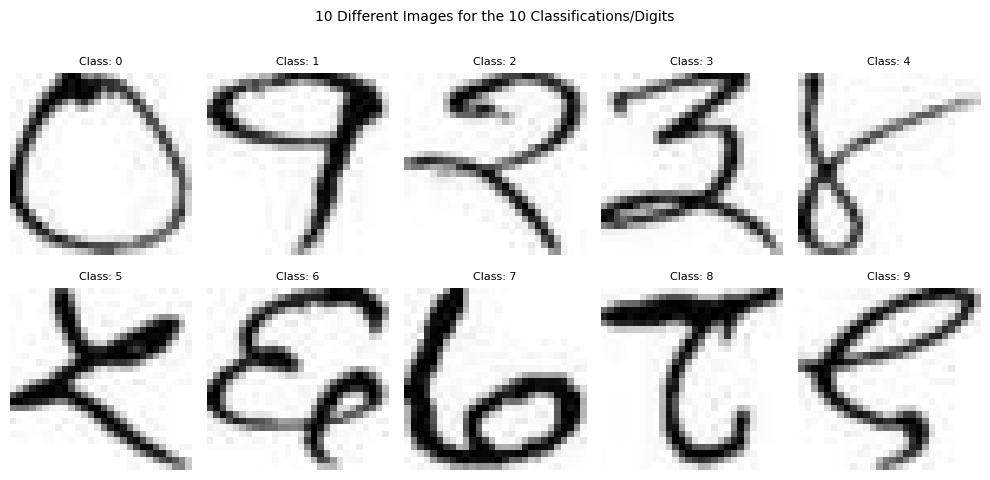

In [ ]:
# Problem
#  "Feedforward Neural Network" or a "Multi-Layer Perceptron (MLP)"

## **Step 1: Setting up project structure and dataset for NN**

### Connecting to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
# Importing all the required libraries
import os
import sys
import zipfile
import tensorflow as tf
import numpy as np
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Dataset Prep

#### Unzipping preprocessed combined dataset

In [3]:
%cd '/content/gdrive/Shareddrives/31005_Machine_Learning'
%ls

/content/gdrive/Shareddrives/31005_Machine_Learning
dataset/  dataset.zip  labels.csv  ML.ipynb  nhcd/  trial/


In [ ]:
# !unzip dataset.zip DO NOT RUN AGAIN

Streaming output truncated to the last 5000 lines.
  inflating: nhcd/nhcd/numerals/1/028_01.jpg  
  inflating: nhcd/nhcd/numerals/1/028_02.jpg  
  inflating: nhcd/nhcd/numerals/1/028_03.jpg  
  inflating: nhcd/nhcd/numerals/1/028_04.jpg  
  inflating: nhcd/nhcd/numerals/1/028_05.jpg  
  inflating: nhcd/nhcd/numerals/1/029_01.jpg  
  inflating: nhcd/nhcd/numerals/1/030_01.jpg  
  inflating: nhcd/nhcd/numerals/1/030_02.jpg  
  inflating: nhcd/nhcd/numerals/1/030_03.jpg  
  inflating: nhcd/nhcd/numerals/1/030_04.jpg  
  inflating: nhcd/nhcd/numerals/1/032_01.jpg  
  inflating: nhcd/nhcd/numerals/1/032_02.jpg  
  inflating: nhcd/nhcd/numerals/1/033_01.jpg  
  inflating: nhcd/nhcd/numerals/1/033_02.jpg  
  inflating: nhcd/nhcd/numerals/1/034_01.jpg  
  inflating: nhcd/nhcd/numerals/1/034_02.jpg  
  inflating: nhcd/nhcd/numerals/1/035_01.jpg  
  inflating: nhcd/nhcd/numerals/1/035_02.jpg  
  inflating: nhcd/nhcd/numerals/1/036_01.jpg  
  inflating: nhcd/nhcd/numerals/1/036_02.jpg  
  inflati

In [ ]:
# !mkdir '/content/gdrive/Shareddrives/31005_Machine_Learning/dataset' # already made - DO NOT RUN AGAIN

In [ ]:
# !mkdir '/content/gdrive/Shareddrives/31005_Machine_Learning/trial' # already made - DO NOT RUN AGAIN

In [7]:
# Define the source directory where the digit folders are located
source_dir = '/content/gdrive/Shareddrives/31005_Machine_Learning/dataset/numerals'

# Define the destination directories for train, validation, and test splits
train_dir = '/content/gdrive/Shareddrives/31005_Machine_Learning/trial/dataset/numerals_train'
validation_dir = '/content/gdrive/Shareddrives/31005_Machine_Learning/trial/dataset/numerals_validation'
test_dir = '/content/gdrive/Shareddrives/31005_Machine_Learning/trial/dataset/numerals_test'


np.random.seed(0) # This is done to ensure reproducibility in random number generation

# Define the class labels and output size
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
output_size = len(class_labels)

In [ ]:
# # Create destination directories if they don't exist
# for directory in [train_dir, validation_dir, test_dir]:
#     if not os.path.exists(directory):
#         os.makedirs(directory)

# %pwd ## everything is like /content/gdrive/Shareddrives/31005_Machine_Learning/trial/dataset/numerals_test
#  DO NOT RUN AGAIN

'/content/gdrive/Shareddrives/31005_Machine_Learning/trial'

In [ ]:
# %cd /content/gdrive/Shareddrives/31005_Machine_Learning/trial
# # Initialize counters for each class
# class_counts = {str(i): 0 for i in range(10)}
# source_dir = '/content/gdrive/Shareddrives/31005_Machine_Learning/dataset/numerals'
# # Iterate through each digit folder (0 to 9)
# for digit in range(10):
#     digit_folder = os.path.join(source_dir, str(digit))

#     # Get a list of image files in the folder
#     image_files = [filename for filename in os.listdir(digit_folder) if filename.endswith('.jpg')]

#     # Split the image files into train, validation, and test sets
#     train_files, temp_files = train_test_split(image_files, test_size=0.3, random_state=42)
#     val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)

#     # Copy images to the respective directories with modified names
#     for filename in train_files:
#         src_path = os.path.join(digit_folder, filename)
#         dst_filename = f"{digit}_{filename}"  # Modified filename
#         dst_path = os.path.join(train_dir, dst_filename)
#         shutil.copy(src_path, dst_path)
#         class_counts[str(digit)] += 1

#     for filename in val_files:
#         src_path = os.path.join(digit_folder, filename)
#         dst_filename = f"{digit}_{filename}"  # Modified filename
#         dst_path = os.path.join(validation_dir, dst_filename)
#         shutil.copy(src_path, dst_path)
#         class_counts[str(digit)] += 1

#     for filename in test_files:
#         src_path = os.path.join(digit_folder, filename)
#         dst_filename = f"{digit}_{filename}"  # Modified filename
#         dst_path = os.path.join(test_dir, dst_filename)
#         shutil.copy(src_path, dst_path)
#         class_counts[str(digit)] += 1
# DO NOT RUN AGAIN

/content/gdrive/Shareddrives/31005_Machine_Learning/trial


In [12]:
def load_and_preprocess_images_from_directory(directory, output_size):
    print(f"Loading and Preprocessing Data from {directory}")
    images = []
    labels = []
    problematic_files = []  # List to store problematic file names
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            parts = filename.split('_')  # Split the filename into label and original name parts
            # print(parts)
            # print(len(parts))
            if len(parts) == 3:
                # print("inside len(parts)")
                label = int(parts[0])  # Extract the label from the filename
                try:
                    # Load the image
                    image = Image.open(os.path.join(directory, filename))
                    image_array = np.array(image)
                    # Normalize pixel values to [0, 1]
                    image_array = image_array / 255.0

                    # Append the preprocessed image and label
                    images.append(image_array)

                    # Ensure that y_batch is one-hot encoded with the correct shape
                    y_batch_one_hot = np.zeros(output_size)
                    y_batch_one_hot[label] = 1  # Set the appropriate index to 1
                    labels.append(y_batch_one_hot)
                except Exception as e:
                    # If there's an error while processing the image, log the filename
                    problematic_files.append(filename)
                    print(f"Error processing {filename}: {str(e)}")

    if problematic_files:
        print("Problematic files:", problematic_files)

    sys.stdout.flush()  # Force the output to be displayed immediately

    return np.array(images), np.array(labels)

In [14]:
# Load and preprocess the images from train, validation, and test directories
X_train, y_train = load_and_preprocess_images_from_directory(train_dir, output_size)
# X_val, y_val = load_and_preprocess_images_from_directory(validation_dir, class_labels, output_size)
X_test, y_test = load_and_preprocess_images_from_directory(test_dir, output_size)

Loading and Preprocessing Data from /content/gdrive/Shareddrives/31005_Machine_Learning/trial/dataset/numerals_train
Loading and Preprocessing Data from /content/gdrive/Shareddrives/31005_Machine_Learning/trial/dataset/numerals_test


In [15]:
print(f"X_train: {X_train} \ny_train: {y_train}")
print(f"X_train.shape: {X_train.shape} \ny_train.shape: {y_train.shape}")

X_train: [[[1.         0.97647059 0.98039216 ... 0.98823529 0.99215686 1.        ]
  [0.99607843 0.99607843 1.         ... 1.         0.98823529 1.        ]
  [0.98431373 1.         1.         ... 1.         0.98431373 1.        ]
  ...
  [0.99215686 0.99215686 0.99215686 ... 0.61176471 0.81176471 0.96862745]
  [1.         1.         1.         ... 0.22745098 0.32941176 0.66666667]
  [1.         1.         1.         ... 0.45882353 0.31372549 0.62745098]]

 [[1.         1.         1.         ... 0.94117647 1.         0.99607843]
  [1.         1.         1.         ... 0.96862745 1.         1.        ]
  [1.         1.         1.         ... 0.76078431 0.96862745 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686 ... 0.42745098 0.38823529 0.80784314]
  [1.         1.         1.         ... 0.19607843 0.34509804 0.68627451]
  [1.         1.         1.         ... 0.67058824 0.82745098 0.98431373]]

 [[1.         1.         1.         ... 0.97647059 0.69411765 0.41568627]
  [1.        

In [16]:
# Assuming your images are grayscale and stored as 28x28 images
# Flatten and preprocess the input data
X_train = X_train.reshape(-1, 784)  # Reshape to (number_of_samples, 784)
X_train = X_train / 255.0  # Normalize pixel values to [0, 1]

# Similarly, preprocess the test data
X_test = X_test.reshape(-1, 784)
X_test = X_test / 255.0

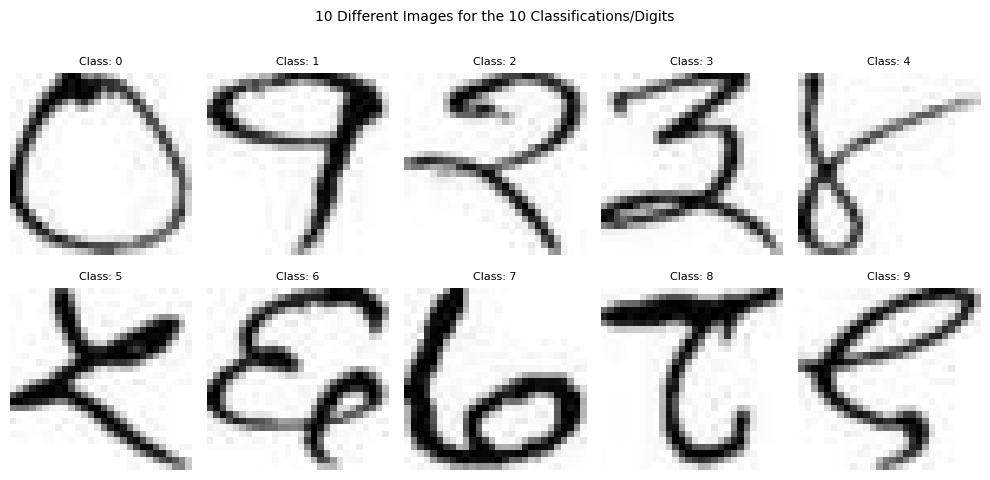

In [35]:
# Get the list of image names (assuming your filenames are available)
image_names = [filename for filename in os.listdir(test_dir) if filename.endswith('.jpg')]

# Initialize a list to store unique class labels
unique_labels = []

# Visualize some results along with image names, real labels, and predictions
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
for i, filename in enumerate(image_names):
    if len(unique_labels) == 10:
        break

    image = X_test[i].reshape(28, 28)
    label = np.argmax(y_test[i])  # Convert one-hot encoding to label

    if label not in unique_labels:
        plt.subplot(2, 5, len(unique_labels) + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Class: {label}", fontsize=8)
        plt.axis('off')
        unique_labels.append(label)

plt.suptitle("10 Different Images for the 10 Classifications/Digits", fontsize=10, y=0.995)
plt.tight_layout()
plt.show()


### Creating Neural Network

In [17]:
# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the softmax function for the output layer
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtracting max(x) for numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Experiment with a different activation function (e.g., ReLU)
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

In [18]:
# Define a neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        # Initialize weights and biases
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

   # Modify the forward and backward functions to use ReLU
    def forward(self, X):
        # Feedforward operation with ReLU activation for the hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = relu(self.hidden_input)
        self.output = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output_probabilities = softmax(self.output)
        return self.output_probabilities

    def backward(self, X, y):
        # Backpropagation with ReLU derivative
        batch_size = X.shape[0]
        d_output = self.output_probabilities - y
        d_hidden = np.dot(d_output, self.weights_hidden_output.T) * relu_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output -= self.learning_rate * np.dot(self.hidden_output.T, d_output) / batch_size
        self.bias_output -= self.learning_rate * np.sum(d_output, axis=0, keepdims=True) / batch_size
        self.weights_input_hidden -= self.learning_rate * np.dot(X.T, d_hidden) / batch_size
        self.bias_hidden -= self.learning_rate * np.sum(d_hidden, axis=0, keepdims=True) / batch_size

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y)
            loss = -np.sum(y * np.log(output)) / len(X)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

## **Step 2: Train Models on **

### Intial Model
*   input_size = 784  # 28x28 = 784 pixels
*   output_size = 10  # 10 classes
*   hidden_size = 2048 # 512 # 1024
*   learning_rate = 0.01 # 0.01 seems good, 0.1 is not the best
*   epochs = 1

#### Initialise and Train Model

##### Hyperparameters

In [38]:
# Create and train the neural network
input_size = 784  # 28x28 = 784 pixels
output_size = 10  # 10 classes

# these are the hyperparmeters
hidden_size = 2048 # 512 # 1024
learning_rate = 0.01 # 0.01 seems good, 0.1 is not the best
epochs = 1


In [21]:
nn_784_2048_10_01_1 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)

In [22]:
nn_784_2048_10_01_1.train(X_train, y_train, epochs)

Epoch 1/1, Loss: 4.5439


#### Predict using trained model

In [23]:
# Make predictions on new data
predictions = nn_784_2048_10_01_1.predict(X_test)
print("Predictions:", predictions)


Predictions: [5 4 1 6 6 1 6 6 6 6 2 6 1 3 6 6 3 6 1 4 6 6 6 6 6 6 3 5 6 4 6 6 6 6 4 1 6
 3 6 6 9 6 9 6 6 6 4 7 6 9 6 4 9 7 9 6 5 9 6 5 6 6 4 4 6 6 6 5 9 9 4 5 6 6
 6 4 6 7 4 6 9 4 6 4 6 6 6 6 6 5 7 2 6 6 6 5 2 7 7 5 6 2 1 1 8 5 5 5 5 6 1
 5 5 6 6 6 5 6 6 6 6 6 5 3 6 7 3 5 3 5 6 5 5 6 3 1 3 7 6 5 6 5 6 0 5 7 0 6
 5 6 8 1 1 7 5 7 5 6 7 0 6 2 5 4 3 7 0 6 5 1 5 6 1 4 8 7 0 4 0 5 6 5 6 5 1
 6 6 6 1 6 0 1 5 6 6 6 6 6 6 1 1 6 5 5 5 1 6 5 5 6 6 5 6 2 5 0 6 5 0 6 5 1
 5 5 0 6 6 5 0 7 0 0 5 5 5 5 5 0 6 7 5 6 5 0 0 5 5 0 1 7 5 5 6 2 5 5 1 8 5
 5 5 5 5 5 3 9 1 6 6 9 6 5 9 5 6 5 5 9 5 5 2 6 4 4 9 1 5 5 5 4 2 6 9 6 7 1
 6 4 5 6 9 9 1 9 9 4 4 1 6 4 6 6 1 2 2 0 6 2 1 9 2 1 5 0 2 6 2 2 1 5 2 6 4
 9 6 6 6 1 6 1 6 6 2 6 2 2 4 1 6 2 9 2 0 1 5 5 1 5 5 5 6 1 1 1 1 6 5 6 1 6
 5 1 5 5 5 0 6 5 1 1 5 5 6 1 1 1 5 5 1 5 6 6 1 5 0 6 5 5 1 6 5 1 6 5 1 5 6
 0 6 5 4 5 5 6 1 6 5 1 0 6 5 5 5 1 9 9 6 0 6 6 5 5 6 5 6 5 6 1 9 6]


#### Visualisation

Accuracy: 9.55%


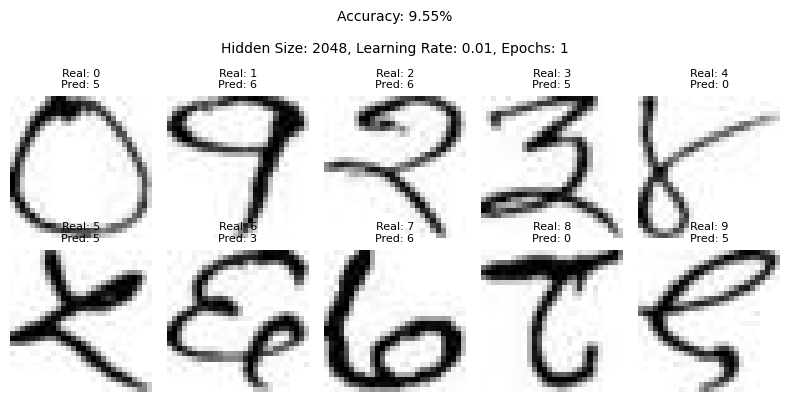

In [37]:
accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy * 100:.2f}%")
# Initialize a list to store unique class labels and their corresponding predictions
unique_labels = []

# Set the figure size and adjust the image size
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
for i, filename in enumerate(image_names):
    if len(unique_labels) == 10:
        break

    image = X_test[i].reshape(28, 28)
    label = np.argmax(y_test[i])  # Convert one-hot encoding to label
    prediction = predictions[i]

    if label not in unique_labels:
        plt.subplot(2, 5, len(unique_labels) + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Real: {label}\nPred: {prediction}", fontsize=8)
        plt.axis('off')
        unique_labels.append(label)

# Add an overall title with accuracy
accuracy_text = f"Accuracy: {accuracy * 100:.2f}%\n\nHidden Size: {hidden_size}, Learning Rate: {learning_rate}, Epochs: {epochs}"
plt.suptitle(accuracy_text, fontsize=10, y=0.995)  # Adjust fontsize and position as needed
plt.tight_layout()
plt.show()


### Model - nn_784_2048_10_01_1000: Accuracy: 71.14%

*   input_size = 784  # 28x28 = 784 pixels
*   output_size = 10  # 10 classes
*   hidden_size = 2048 # 512 # 1024
*   learning_rate = 0.01 # 0.01 seems good, 0.1 is not the best
*   epochs = 1000

#### Initialise and Train Model

##### Hyperparameters

In [39]:
# Create and train the neural network
input_size = 784  # 28x28 = 784 pixels
output_size = 10  # 10 classes

# these are the hyperparmeters
hidden_size = 2048 # 512 # 1024
learning_rate = 0.01 # 0.01 seems good, 0.1 is not the best
epochs = 1000


In [40]:
nn_784_2048_10_01_1000 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)

In [41]:
nn_784_2048_10_01_1000.train(X_train, y_train, epochs)

Epoch 1/1000, Loss: 6.1890
Epoch 2/1000, Loss: 3.9923
Epoch 3/1000, Loss: 3.3868
Epoch 4/1000, Loss: 3.1466
Epoch 5/1000, Loss: 2.9847
Epoch 6/1000, Loss: 2.8793
Epoch 7/1000, Loss: 2.8225
Epoch 8/1000, Loss: 2.7909
Epoch 9/1000, Loss: 2.7673
Epoch 10/1000, Loss: 2.7454
Epoch 11/1000, Loss: 2.7239
Epoch 12/1000, Loss: 2.7028
Epoch 13/1000, Loss: 2.6820
Epoch 14/1000, Loss: 2.6615
Epoch 15/1000, Loss: 2.6414
Epoch 16/1000, Loss: 2.6217
Epoch 17/1000, Loss: 2.6024
Epoch 18/1000, Loss: 2.5836
Epoch 19/1000, Loss: 2.5651
Epoch 20/1000, Loss: 2.5470
Epoch 21/1000, Loss: 2.5292
Epoch 22/1000, Loss: 2.5118
Epoch 23/1000, Loss: 2.4946
Epoch 24/1000, Loss: 2.4777
Epoch 25/1000, Loss: 2.4612
Epoch 26/1000, Loss: 2.4449
Epoch 27/1000, Loss: 2.4288
Epoch 28/1000, Loss: 2.4131
Epoch 29/1000, Loss: 2.3976
Epoch 30/1000, Loss: 2.3824
Epoch 31/1000, Loss: 2.3676
Epoch 32/1000, Loss: 2.3529
Epoch 33/1000, Loss: 2.3385
Epoch 34/1000, Loss: 2.3243
Epoch 35/1000, Loss: 2.3104
Epoch 36/1000, Loss: 2.2967
E

#### Predict using trained model

In [42]:
# Make predictions on new data
predictions_784_2048_10_01_1000 = nn_784_2048_10_01_1000.predict(X_test)
print("Predictions:", predictions_784_2048_10_01_1000)


Predictions: [7 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 2 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0
 0 0 0 7 0 0 0 1 1 9 9 9 1 1 1 1 7 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 9 1
 9 1 1 1 1 1 1 1 1 9 1 1 1 1 9 2 3 2 2 5 2 2 2 3 3 2 5 3 2 5 2 2 2 2 2 3 3
 2 3 2 3 2 2 2 2 2 2 2 2 3 3 1 5 2 2 3 3 6 3 7 3 3 6 3 9 3 2 3 3 2 3 3 1 2
 3 2 0 6 0 3 3 5 3 7 3 6 3 3 2 2 3 0 3 8 6 0 3 3 0 9 2 4 5 7 4 4 4 4 5 9 5
 4 4 4 7 4 9 5 5 5 4 4 4 4 6 4 4 4 4 7 6 4 4 7 2 5 4 4 4 5 4 4 4 4 4 4 5 5
 5 5 5 5 5 3 2 5 2 5 5 5 5 5 5 2 2 5 5 5 9 5 5 5 7 5 6 5 1 5 6 3 5 5 5 5 5
 2 3 2 5 4 6 6 6 6 6 6 3 6 2 9 8 6 6 6 6 6 6 9 9 9 2 6 6 6 9 6 6 8 9 4 6 6
 6 6 6 6 6 6 6 6 6 6 7 6 7 7 7 7 6 7 7 4 0 7 7 7 7 7 7 7 7 7 7 7 7 7 7 4 7
 7 7 7 7 2 7 7 7 7 0 6 7 7 7 7 7 0 7 7 8 8 8 8 8 8 8 6 8 8 8 9 8 8 6 8 8 8
 8 8 8 5 8 4 5 8 8 7 8 8 8 8 8 6 8 6 8 8 8 8 8 8 8 8 9 9 9 1 9 9 8 9 9 9 4
 4 9 9 4 9 9 9 9 9 9 6 5 9 9 9 8 9 9 9 9 6 9 9 9 9 9 9 9 9 9 9 9 9]


#### Visualisation

Accuracy: 71.14%


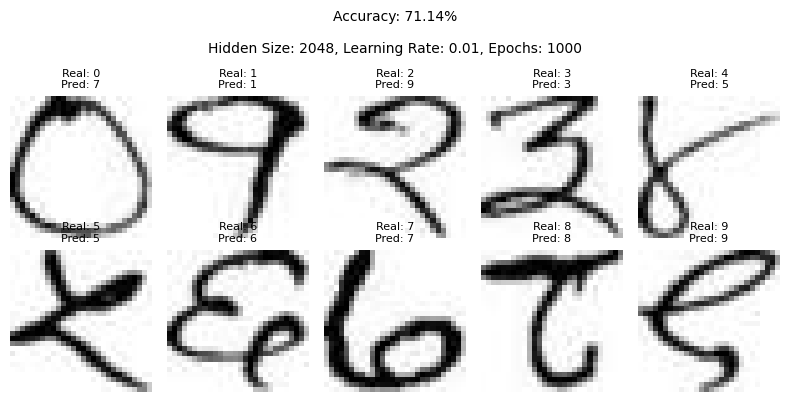

In [43]:
accuracy_784_2048_10_01_1000 = np.mean(predictions_784_2048_10_01_1000 == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy_784_2048_10_01_1000 * 100:.2f}%")
# Initialize a list to store unique class labels and their corresponding predictions
unique_labels = []

# Set the figure size and adjust the image size
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
for i, filename in enumerate(image_names):
    if len(unique_labels) == 10:
        break

    image_784_2048_10_01_1000 = X_test[i].reshape(28, 28)
    label_784_2048_10_01_1000 = np.argmax(y_test[i])  # Convert one-hot encoding to label
    prediction_784_2048_10_01_1000 = predictions_784_2048_10_01_1000[i]

    if label_784_2048_10_01_1000 not in unique_labels:
        plt.subplot(2, 5, len(unique_labels) + 1)
        plt.imshow(image_784_2048_10_01_1000, cmap='gray')
        plt.title(f"Real: {label_784_2048_10_01_1000}\nPred: {prediction_784_2048_10_01_1000}", fontsize=8)
        plt.axis('off')
        unique_labels.append(label_784_2048_10_01_1000)

# Add an overall title with accuracy
accuracy_text_784_2048_10_01_1000 = f"Accuracy: {accuracy_784_2048_10_01_1000 * 100:.2f}%\n\nHidden Size: {hidden_size}, Learning Rate: {learning_rate}, Epochs: {epochs}"
plt.suptitle(accuracy_text_784_2048_10_01_1000, fontsize=10, y=0.995)  # Adjust fontsize and position as needed
plt.tight_layout()
plt.show()
